In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  7 10:28:41 2020

@author: cm
"""

from networks import SentimentAnalysis
import re
from matplotlib import pyplot as plt
from tqdm import tqdm, trange


SA = SentimentAnalysis()


def predict(sent):
    """
    1: positif
    0: neutral
    -1: negatif
    """
    score1,score0 = SA.normalization_score(sent)
    if score1 == score0:
        result = 0
    elif score1 > score0:
        result = 1
    elif score1 < score0:
        result = -1
    return score1 - score0 #result

# 版本为python3，如果为python2需要在字符串前面加上u


def cut_sent(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return para.split("\n")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/m5/_dlm1fm578j4xyq7t42q21vh0000gp/T/jieba.cache


Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/not.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/positive.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/negative.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/most.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/very.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/more.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/ish.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/insufficiently.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/over.txt) finished !
Load data from file (/Users/zinccat/Documents/挑战杯/sentiment_analysis_dict/dict/inver

Loading model cost 2.568 seconds.
Prefix dict has been built successfully.


In [13]:
s = []
chap = []
for i in range(1, 133):
    with open("/Users/zinccat/Documents/挑战杯/废后将军文本/第{}章.txt".format(i), 'r', encoding='utf-8') as f:
        text = f.read()
        text = cut_sent(text)
        text = list(filter(None, text))
        chap.append(len(text))
    for w in text:
        s.append(predict(w))
for i in range(1, 132):
    chap[i] += chap[i-1]

100%|██████████| 25801/25801 [00:00<00:00, 352577.24it/s]


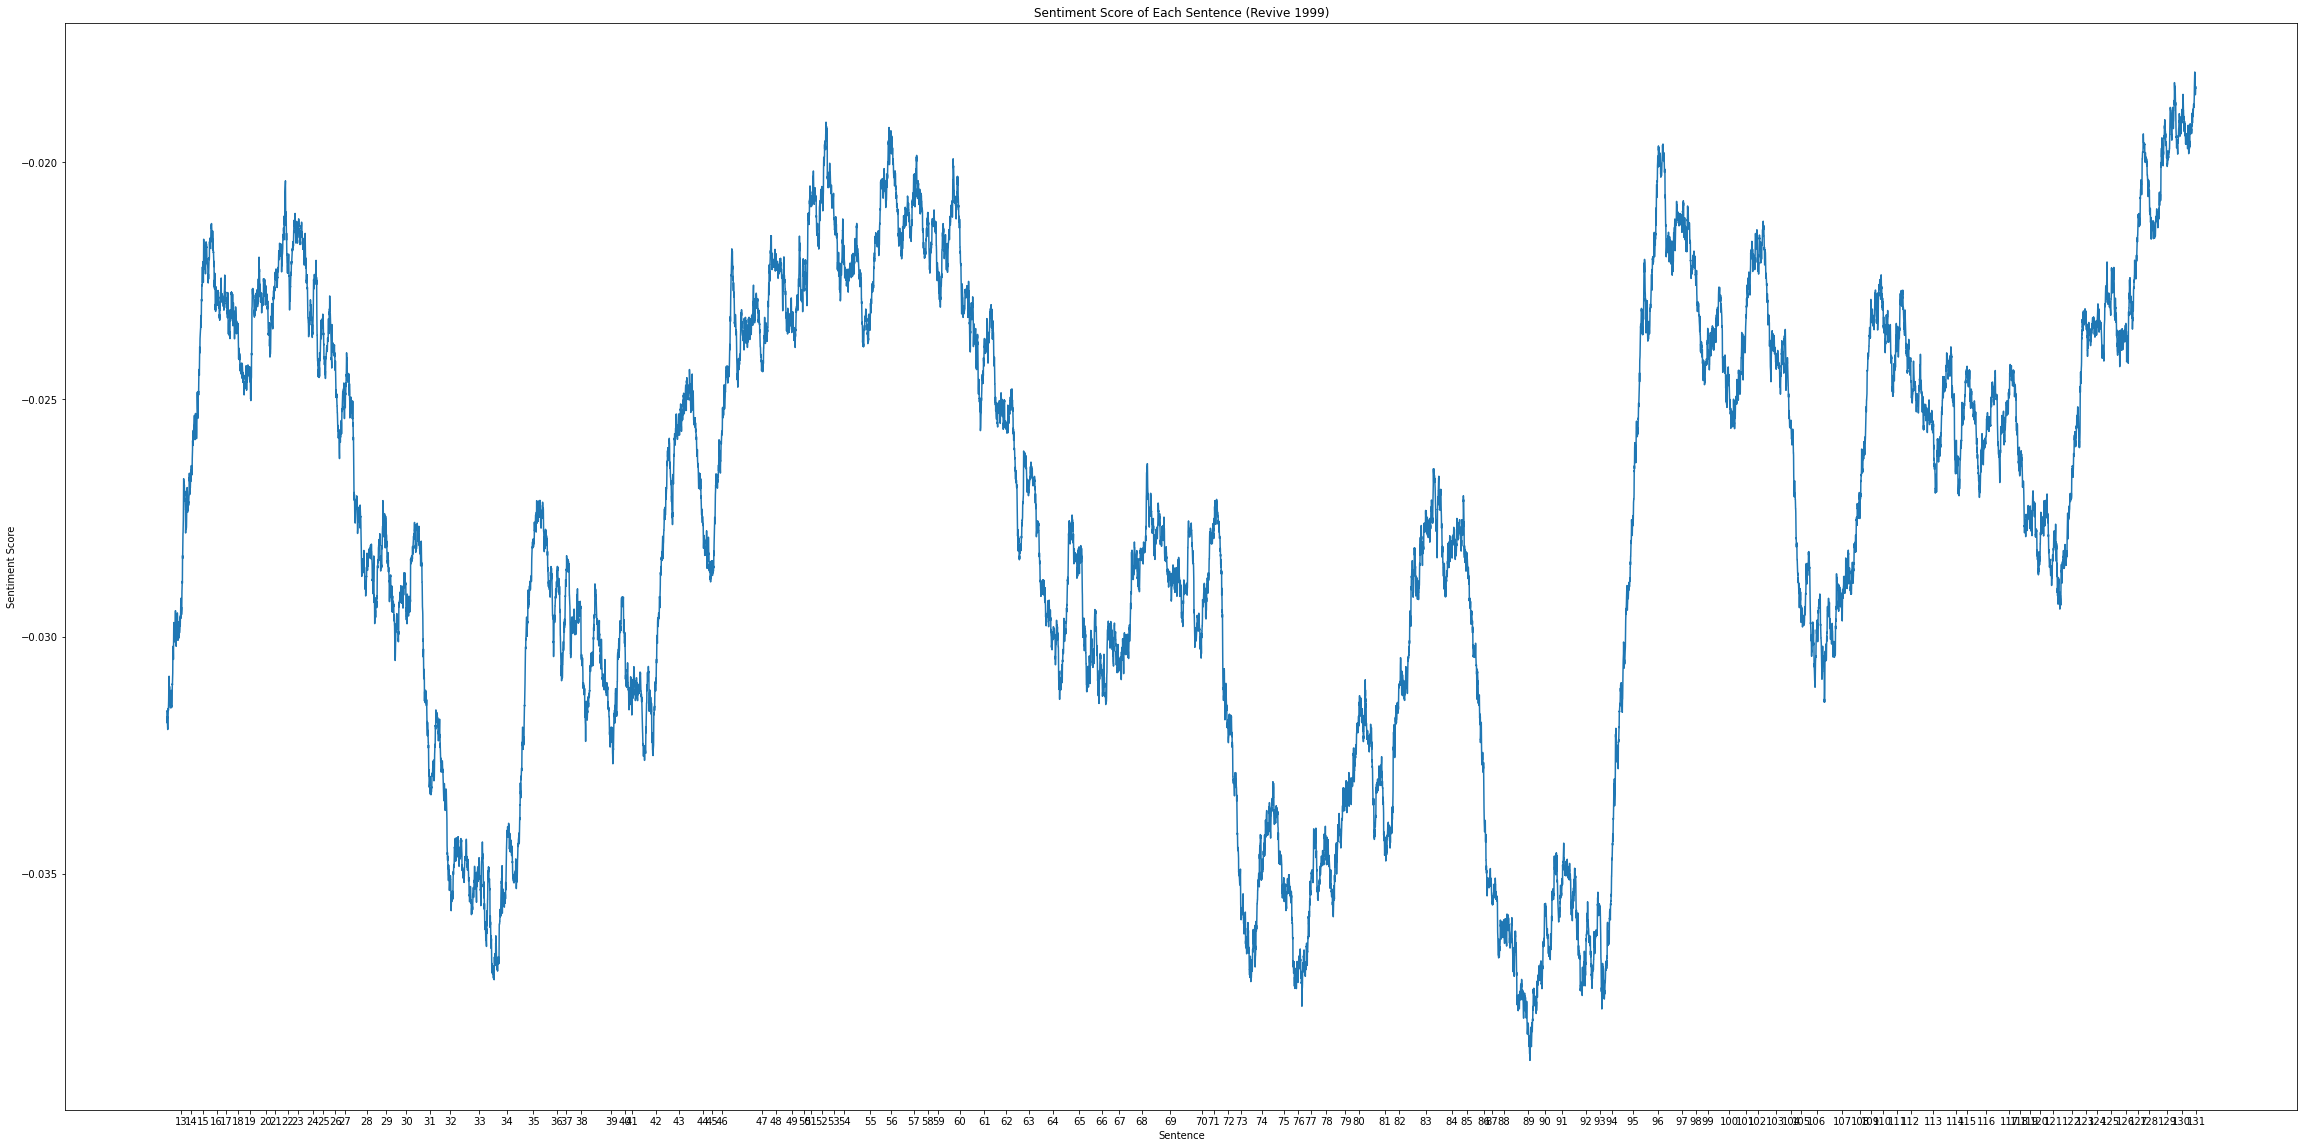

In [64]:
n_list = [2000]#[2, 10, 100, 500, 1000]
for n in n_list:
    l = []
    sc = 0
    for i in trange(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))
        # else:
        #     l.append(sc/i)
        # idxes = list(range(1, len(outputs)))
    plt.figure(figsize=(40, 20))
    plt.plot(l)
    
    plt.xlabel("Chapter")
    plt.ylabel("Sentiment Score")
    x = np.array(chap)-n
    y = np.where(x>0)
    x = x[x>0]
    # print(x)
    plt.xticks(x, y[0], fontsize=10)
    plt.title("Sentiment Score of Each Sentence (Revive {})".format(n-1))
    plt.show()
    # plt.savefig("/Users/zinccat/Documents/挑战杯/废后将军文本/图{}.png".format(n-1))


In [56]:
y

(array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131]),)

In [70]:
s = []
chap = []
for i in range(1, 168):
    # print(i)
    with open("/Users/zinccat/Documents/挑战杯/老婆粉了解一下(文本)/第{}章.txt".format(i), 'r', encoding='utf-8') as f:
        text = f.read()
        text = cut_sent(text)
        text = list(filter(None, text))
        chap.append(len(text))
    for w in text:
        s.append(predict(w))
for i in range(1, 167):
    chap[i] += chap[i-1]


In [71]:
len(s)

24640

100%|██████████| 24639/24639 [00:00<00:00, 779344.78it/s]


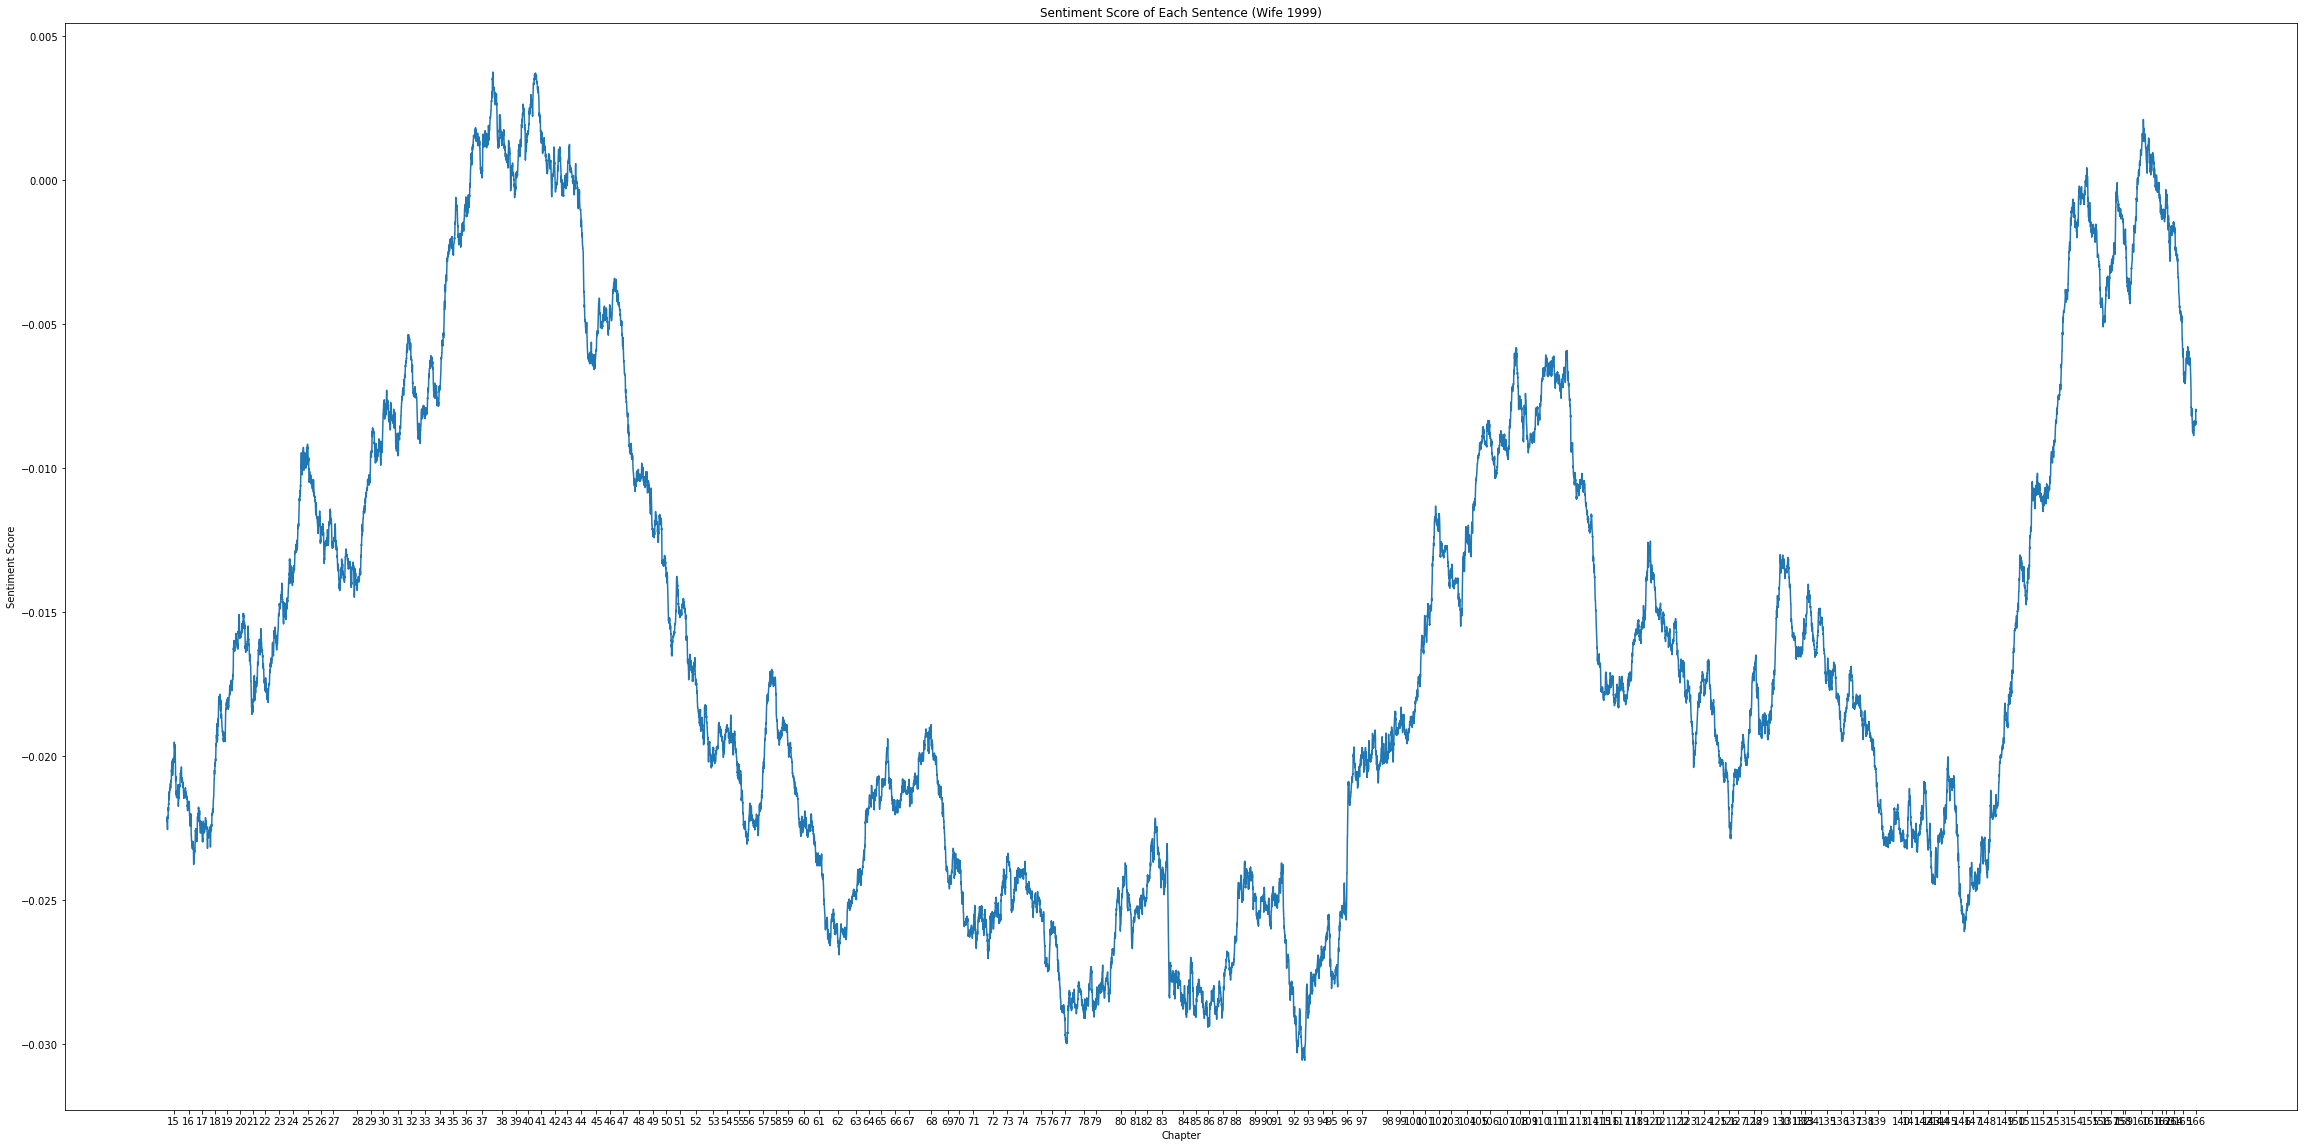

In [72]:
n_list = [2000]#[2, 10, 100, 500, 1000]
for n in n_list:
    l = []
    sc = 0
    for i in trange(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))
        # else:
        #     l.append(sc/i)
        # idxes = list(range(1, len(outputs)))
    plt.figure(figsize=(40, 20))
    plt.plot(l)
    
    plt.xlabel("Chapter")
    plt.ylabel("Sentiment Score")
    x = np.array(chap)-n
    y = np.where(x>0)
    x = x[x>0]
    # print(x)
    plt.xticks(x, y[0], fontsize=10)
    plt.title("Sentiment Score of Each Sentence (Wife {})".format(n-1))
    plt.show()
    # plt.savefig("/Users/zinccat/Documents/挑战杯/废后将军文本/图{}.png".format(n-1))
